In [91]:
import os, pickle
ridge_model_path = "/Users/myramalik/Desktop/Myra_Malik_A1/laptop_price_task/models/regression_model2.pkl"
with open(ridge_model_path, "wb") as f:
    pickle.dump({"weights": weights_ridge, "has_bias": True, "lambda": 0.1}, f)
print("Put in file", ridge_model_path)


Put in file /Users/myramalik/Desktop/Myra_Malik_A1/laptop_price_task/models/regression_model2.pkl


In [ ]:
# RIDGE REGRESSION

weights_ridge, predictions_ridge, mse_r, rmse_r, r2_r = ridge_reg(
    x_train_encoded.to_numpy(), y_train_np,
    x_test_encoded.to_numpy(), y_test_np,
    lam=0.01 
)

Ridge λ= 0.01
MSE: 250815816.69
RMSE: 15837.17
R²: 0.79


In [86]:
import numpy as np

def ridge_reg(X_train, y_train, X_test, y_test, lam=0.1):
   # convert
    X_train = X_train.astype(float, copy=True)
    X_test  = X_test.astype(float, copy=True)
    y_train = y_train.astype(float)
    y_test  = y_test.astype(float)

   
    X_train_b = add_bias(X_train)
    X_test_b  = add_bias(X_test)

    # fit 
    w = ridge_regression(X_train_b, y_train, lam=lam)

    # predict
    y_pred = predict_linear(X_test_b, w)

    # metrics
    errors = y_test - y_pred
    mse = (errors**2).mean()
    rmse = np.sqrt(mse)
    r2 = 1 - np.sum(errors**2) / np.sum((y_test - y_test.mean())**2)

    print("Ridge λ=", lam)
    print("MSE:", round(mse, 2))
    print("RMSE:", round(rmse, 2))
    print("R²:", round(r2, 2))

    return w, y_pred, mse, rmse, r2


In [85]:
import numpy as np

def ridge_regression(X, y, lam=0.1):
    n_features = X.shape[1]
    I = np.eye(n_features)
    I[0,0] = 0   
    XtX = X.T @ X
    Xty = X.T @ y
    w = np.linalg.pinv(XtX + lam * I) @ Xty
    return w


In [73]:
import pickle

model_data = {
    "weights": weights,
    "has_bias": True
}

with open("/Users/myramalik/Desktop/Myra_Malik_A1/laptop_price_task/models/regression_model1.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model saved into file.")



Model saved into file.


In [64]:
import numpy as np

def linear_reg(X_train, y_train, X_test, y_test):
    # add bias
    X_train = x_train_encoded.to_numpy(dtype=float, copy=True)
    X_train_b = add_bias(X_train)
    X_test  = x_test_encoded.to_numpy(dtype=float, copy=True)
    X_test_b = add_bias(X_test)

    # fit 
    w = fit_linear_normal_eq(X_train_b, y_train)

    # predict
    y_pred = predict_linear(X_test_b, w)

    # stuff
    errors = y_test - y_pred
    mse = (errors ** 2).mean()
    rmse = np.sqrt(mse)
    r2 = 1 - np.sum(errors ** 2) / np.sum((y_test - y_test.mean()) ** 2)

    print("MSE:", round(mse, 2))
    print("RMSE:", round(rmse, 2))
    print("R²:", round(r2, 2))

    return w, y_pred

weights, predictions = linear_reg(X_train, y_train_np, X_test, y_test_np)



MSE: 252709986.13
RMSE: 15896.85
R²: 0.78


In [56]:
import numpy as np

# bias - column of 1s
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def fit_linear_normal_eq(X, y):
    XtX = X.T @ X
    Xty = X.T @ y
    w = np.linalg.pinv(XtX) @ Xty
    return w

def predict_linear(X, w):
    return X @ w


In [43]:
df.to_csv("/Users/myramalik/Desktop/Myra_Malik_A1/laptop_price_task/data/train_data.csv", index=False)



In [40]:
# encode
x_train_encoded = pd.get_dummies(x_train, drop_first=True)

# encode test 
x_test_encoded = pd.get_dummies(x_test, drop_first=True)

# aligning
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)

print("x_train_encoded shape:", x_train_encoded.shape)
print("x_test_encoded shape:", x_test_encoded.shape)
print(x_train_encoded.columns.tolist())



x_train_encoded shape: (938, 313)
x_test_encoded shape: (234, 313)
['Inches', 'Ram', 'Weight', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage', 'Cpu_Speed', 'ScreenWidth', 'ScreenHeight', 'Touchscreen', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'ScreenResolution_1440x900', 'ScreenResolution_1600x900', 'ScreenResolution_1920x1080', 'ScreenResolution_2560x1440', 'ScreenResolution_4K Ultra HD / Touchscreen 3840x2160', 'ScreenResolution_4K Ultra HD 3840x2160', 'ScreenResolution_Full HD / Touchscreen 1920x1080', 'ScreenResolution_Full HD 1920x1080', 'ScreenResolution_IPS Panel 1366x768', 'ScreenResolution_IPS Panel 2560x1440', 'S

In [38]:
# check if split seems fine

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (938, 21)
x_test shape: (234, 21)
y_train shape: (938,)
y_test shape: (234,)


In [37]:
import numpy as num

num.random.seed(36)

n = len(df)

shuffle = num.random.permutation(n)

test_size = int(0.2 * n)

# split indices
test = shuffle[:test_size]
train = shuffle[test_size:]

# assign
x_train, x_test = x.iloc[train], x.iloc[test]
y_train, y_test = y.iloc[train], y.iloc[test]


In [27]:
x = df.drop('Price', axis=1)   
y = df['Price']                

In [ ]:
#### CLEANING CODE BELOW #####

In [23]:
#OS CLEANING
def simplify_os(os_string):
    if "Windows" in os_string:
        return "Windows"
    elif "Mac" in os_string:
        return "Mac"
    elif "Linux" in os_string:
        return "Linux"
    elif "No OS" in os_string:
        return "No OS"
    else:
        return "Other"

df['OpSys_Simplified'] = df['OpSys'].apply(simplify_os)

# check
df[['OpSys','OpSys_Simplified']].head(10)


,OpSys,OpSys_Simplified
0,Linux,Linux
1,Windows 10,Windows
2,Linux,Linux
3,Windows 10,Windows
4,Windows 10,Windows
5,Windows 10,Windows
6,Windows 10,Windows
7,Windows 10,Windows
8,No OS,No OS
9,Windows 7,Windows


In [22]:
#GPU CLEANING
# brand 
df['Gpu_Brand'] = df['Gpu'].str.split().str[0]

# check
df[['Gpu','Gpu_Brand']].head(10)


,Gpu,Gpu_Brand
0,Nvidia GeForce GTX 1050 Ti,Nvidia
1,Intel HD Graphics 500,Intel
2,Intel HD Graphics,Intel
3,Intel HD Graphics 620,Intel
4,Intel HD Graphics 520,Intel
5,Nvidia GeForce GTX 1050 Ti,Nvidia
6,Nvidia GeForce GTX 1050 Ti,Nvidia
7,Intel UHD Graphics 620,Intel
8,Nvidia GeForce GTX 1050,Nvidia
9,Intel HD Graphics 520,Intel


In [21]:
#SCREEN RES CLEANING
# width and height
df['ScreenWidth'] = df['ScreenResolution'].str.extract(r'(\d+)x')[0].astype(int)
df['ScreenHeight'] = df['ScreenResolution'].str.extract(r'x(\d+)')[0].astype(int)

# shows 1 if "Touchscreen" is in the string
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen').astype(int)

# check 
df[['ScreenResolution','ScreenWidth','ScreenHeight','Touchscreen']].head(10)


,ScreenResolution,ScreenWidth,ScreenHeight,Touchscreen
0,Full HD 1920x1080,1920,1080,0
1,1366x768,1366,768,0
2,1366x768,1366,768,0
3,Touchscreen 2560x1440,2560,1440,1
4,1366x768,1366,768,0
5,Full HD 1920x1080,1920,1080,0
6,4K Ultra HD 3840x2160,3840,2160,0
7,Full HD 1920x1080,1920,1080,0
8,IPS Panel Full HD 1920x1080,1920,1080,0
9,Full HD 1920x1080,1920,1080,0


In [20]:
#CPU RELATED CLEANING
# extract cpu brand
df['Cpu_Brand'] = df['Cpu'].str.split().str[0]

# extract GHz 
df['Cpu_Speed'] = df['Cpu'].str.extract(r'(\d+\.?\d*)GHz').astype(float)

df[['Cpu','Cpu_Brand','Cpu_Speed']].head(10)


,Cpu,Cpu_Brand,Cpu_Speed
0,Intel Core i7 7700HQ 2.8GHz,Intel,2.8
1,Intel Celeron Dual Core N3350 1.1GHz,Intel,1.1
2,Intel Celeron Dual Core N3060 1.6GHz,Intel,1.6
3,Intel Core i7 7500U 2.7GHz,Intel,2.7
4,Intel Core i3 6006U 2GHz,Intel,2.0
5,Intel Core i7 7700HQ 2.8GHz,Intel,2.8
6,Intel Core i7 7700HQ 2.8GHz,Intel,2.8
7,Intel Core i7 8550U 1.8GHz,Intel,1.8
8,Intel Core i5 7300HQ 2.5GHz,Intel,2.5
9,Intel Core i5 6200U 2.3GHz,Intel,2.3


In [ ]:
# MEMORY RELATED CLEANING
# replace TB with 1000GB in mem
df['Memory'] = df['Memory'].str.replace('TB', '000GB')

# for split (+ to ' ')
df['Memory'] = df['Memory'].str.replace(r'\s*\+\s*', ' ', regex=True)

# extract info
memory_new = pd.DataFrame({
    'HDD': df['Memory'].str.extract(r'(\d+)GB HDD')[0].fillna(0).astype(int),
    'SSD': df['Memory'].str.extract(r'(\d+)GB SSD')[0].fillna(0).astype(int),
    'Hybrid': df['Memory'].str.extract(r'(\d+)GB Hybrid')[0].fillna(0).astype(int),
    'Flash_Storage': df['Memory'].str.extract(r'(\d+)GB Flash')[0].fillna(0).astype(int),
})

# add cols to df
df = pd.concat([df, memory_new], axis=1)

# check
df[['Memory','HDD','SSD','Hybrid','Flash_Storage']].head(10)


,Memory,HDD,SSD,Hybrid,Flash_Storage
0,256GB SSD,0,256,0,0
1,32GB Flash Storage,0,0,0,32
2,500GB HDD,500,0,0,0
3,1000GB SSD,0,1000,0,0
4,500GB HDD,500,0,0,0
5,128GB SSD 1000GB HDD,1000,128,0,0
6,512GB SSD,0,512,0,0
7,256GB SSD,0,256,0,0
8,1000GB HDD,1000,0,0,0
9,500GB HDD,500,0,0,0


In [ ]:
#BASIC NUMBER CLEANING
# clean RAM 
df['Ram'] = df['Ram'].str.replace("GB", "").astype(int)

# clean weight 
df['Weight'] = df['Weight'].str.replace("kg", "").astype(float)

# check if cleaned 
df[['Ram', 'Weight']].head()


,Ram,Weight
0,8,2.50
1,4,1.50
2,4,2.20
3,16,1.42
4,4,2.40


In [ ]:
df["Company"].unique()
df["Cpu"].unique()[:10]   # first 10

array(['Intel Core i7 7700HQ 2.8GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 8550U 1.8GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'Intel Core i5 6200U 2.3GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Core i7 6500U 2.5GHz'], dtype=object)

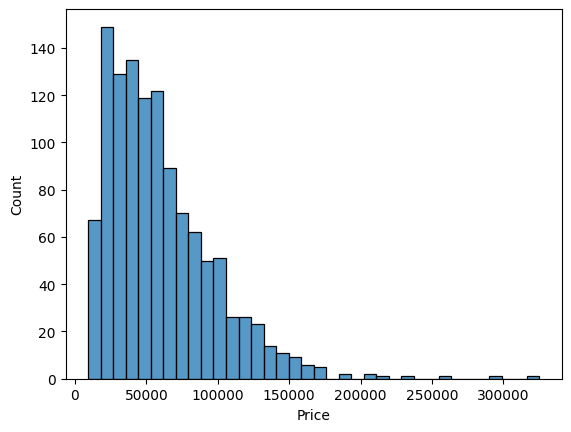

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Price"])
plt.show()


In [12]:
df.isnull().sum()


Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
df.describe

<bound method NDFrame.describe of      Company            TypeName  Inches       ScreenResolution  \
0       Acer            Notebook    15.6      Full HD 1920x1080   
1       Asus            Notebook    14.0               1366x768   
2       Dell            Notebook    15.6               1366x768   
3     Lenovo  2 in 1 Convertible    14.0  Touchscreen 2560x1440   
4       Acer            Notebook    15.6               1366x768   
...      ...                 ...     ...                    ...   
1167    Dell           Ultrabook    14.0      Full HD 1920x1080   
1168    Dell              Gaming    15.6      Full HD 1920x1080   
1169  Lenovo            Notebook    17.3               1600x900   
1170  Lenovo              Gaming    15.6      Full HD 1920x1080   
1171      HP           Ultrabook    12.5      Full HD 1920x1080   

                                       Cpu   Ram              Memory  \
0              Intel Core i7 7700HQ 2.8GHz   8GB           256GB SSD   
1     Intel Celer

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1172 non-null   object 
 1   TypeName          1172 non-null   object 
 2   Inches            1172 non-null   float64
 3   ScreenResolution  1172 non-null   object 
 4   Cpu               1172 non-null   object 
 5   Ram               1172 non-null   object 
 6   Memory            1172 non-null   object 
 7   Gpu               1172 non-null   object 
 8   OpSys             1172 non-null   object 
 9   Weight            1172 non-null   object 
 10  Price             1172 non-null   float64
dtypes: float64(2), object(9)
memory usage: 100.8+ KB


In [9]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [7]:
df.shape

(1172, 11)

In [8]:
import pandas as pd
df = pd.read_csv("../data/train_data.csv")
df.head() 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,52161.120
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.840
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.000
